In [315]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import re

In [316]:
loan = pd.read_csv("loan.csv", sep=",",encoding = "ISO-8859-1",low_memory = False)
#Information about dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [317]:

#get number of rows and columns in the dataset

print("Shape of the dataset : ", loan.shape,"\n")
print("Columns of the dataset : ")
loan.columns

Shape of the dataset :  (39717, 111) 

Columns of the dataset : 


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning and Manipulation  Start

In [318]:
#get columns with null values
null_columns = loan.columns[loan.isnull().any()]

print("Columns containing NA values : \n" , null_columns,"\n\n")

#get percentage of null values
null_count = (loan[null_columns].isnull().sum()/len(loan.index))*100

print("Percentage of null values in each columns : \n",null_count)

Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_12

In [319]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)
loan_df = loan.drop(missing_columns, axis=1)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [320]:
print("Column details after removing null values")
print("=============================================")
print("Shape of the dataset : ",loan_df.shape)
#get columns with null values
null_columns = loan_df.columns[loan_df.isnull().any()]
print("Columns containing NA values : \n" , null_columns,"\n\n")

#get percentage of null values
null_count = (loan_df[null_columns].isnull().sum()/len(loan_df.index))*100
print("Percentage of null values in each columns : \n",null_count)

Column details after removing null values
Shape of the dataset :  (39717, 55)
Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object') 


Percentage of null values in each columns : 
 emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64



<li>We could see there were 39717 rows and 111 columns in the given dataset.
<li>Out of 111 columns, there are lots of columns 90 % + rows having only NA values which will be no use for analysis.
<li>We removed the columns with NA values and those are not contributing to the analysis.

In [321]:
#seeing the dataset after dropping the columns with 90% NA values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [322]:
#checking categorical variables and see for useful info
unique_columns = loan_df.columns[loan_df.nunique(dropna=False) < 10]

for i in range(0,len(unique_columns)):
  print("Column: ",unique_columns[i],"having unique values: ",loan_df[unique_columns[i]].unique())

Column:  term having unique values:  [' 36 months' ' 60 months']
Column:  grade having unique values:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Column:  home_ownership having unique values:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
Column:  verification_status having unique values:  ['Verified' 'Source Verified' 'Not Verified']
Column:  loan_status having unique values:  ['Fully Paid' 'Charged Off' 'Current']
Column:  pymnt_plan having unique values:  ['n']
Column:  inq_last_6mths having unique values:  [1 5 2 0 3 4 6 7 8]
Column:  pub_rec having unique values:  [0 1 2 3 4]
Column:  initial_list_status having unique values:  ['f']
Column:  collections_12_mths_ex_med having unique values:  [ 0. nan]
Column:  policy_code having unique values:  [1]
Column:  application_type having unique values:  ['INDIVIDUAL']
Column:  acc_now_delinq having unique values:  [0]
Column:  chargeoff_within_12_mths having unique values:  [ 0. nan]
Column:  delinq_amnt having unique values:  [0]
Column:  pub_rec_bankrupt

In [323]:
#Drop columns having only one categorical value
drop_cols = [c for c in list(loan_df) if loan_df[c].nunique() <= 1]
#print(drop_cols)
loan_df = loan_df.drop(columns=drop_cols)

###  Dropping Customer behaviour variables based on the guidance given during query resolution session
These values will not be available at the point of decision making hence not relevant

In [324]:
behaviour_var =  ["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "pub_rec_bankruptcies",                
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]
loan_df = loan_df.drop(behaviour_var, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

In [325]:
#Removing other irrelenant columns
loan_df = loan_df.drop(columns=['id','member_id','mths_since_last_delinq','desc','emp_title','url','title','zip_code'], inplace=False)

In [326]:

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  addr_state           39717 non-null 

### Dropping rows with loan status = Curent
Not relevant for analysis

In [327]:
loan_df.drop(loan_df[(loan_df['loan_status'] == 'Current')].index, inplace=True)

In [329]:
round(loan_df.isnull().sum()/len(loan_df.index)*100,2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

 ### Emp_Length Null Value  : Replace by 0 and convert to int

In [330]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [331]:
loan_df['emp_length'].fillna(0,inplace=True)

In [332]:
loan_df.emp_length = loan_df['emp_length'].apply(lambda x: re.split(r'(\d+)',str(x))[1]).astype('int64')

In [333]:
loan_df['emp_length'].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_length, dtype: int64

In [334]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  int64  
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

### Date mapping : String to Convert date time

In [335]:
# Coverting Dates to date time format 
loan_df.issue_d=pd.to_datetime(loan_df.issue_d, format='%b-%y', errors='ignore')

In [336]:
# extracting month and year from issue_date
loan_df['issue_month'] = loan_df['issue_d'].apply(lambda x: x.month)
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x: x.year)

In [337]:
loan_df.shape

(38577, 19)

### Rounding floats

In [338]:
loan_df.funded_amnt_inv=round(loan_df.funded_amnt_inv, 2)

### Object to numerical: Interest Rate , term

In [339]:
# Removing months from term column and converting to int
loan_df['term'] = loan_df['term'].str.replace(r'months','').astype('int64')
# Interest Rate to float
loan_df.int_rate = loan_df.int_rate.str.strip('%.').astype('float').round(2)

### Converting Loan_status to 0 or 1 

In [340]:
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
loan_df['loan_status'] = loan_df['loan_status'].astype(float)

### Creating Data Bins

In [444]:
#Fundend Amount Bins : 1000s
loan_df['funded_amnt_bins'] = pd.cut(x=loan_df['funded_amnt']/1000, bins=[0,1,2,3,4,5,10,15,20,25,30,35], 
                    labels=['0-1K','1K-2K','2K-3K','3K-4K','4K-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K']) 

In [355]:
# Funded to income ratio 
loan_df['funded_to_income']=(loan_df['funded_amnt']*100/loan_df['annual_inc']).astype(int)

In [356]:
# Funded to income Bins
loan_df['funded_to_income_bins'] = pd.cut(x=loan_df['funded_to_income'], bins=[0,10,20,30,40,50,60,70,80,90,100], 
                    labels=['0-10K','10K-20K','20K-30K','30K-40K','40K-50K','50K-60K','60K-70K','70K-80K','80K-90K','90K-100K']) 

In [357]:
# Interest rate Bins
loan_df['int_rate_bins'] = pd.cut(x=loan_df['int_rate'], bins=[5,7,9,11,13,15,17,19,21,23,25], 
                    labels=['5-7','7-9','9-11','11-13','13-15','15-17','17-19','19-21','21-23','23-25']) 


In [358]:
# DTI Bins
loan_df['dti_bins'] = pd.cut(x=loan_df['dti'], bins=[0,3,6,9,12,15,18,21,24,27,30], 
                    labels=['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24','24-27','27-30']) 

In [359]:
# Funded Amount INV Bins
loan_df['funded_amnt_inv_bins'] = pd.cut(x=loan_df['funded_amnt_inv']/1000, bins=[0,1,2,3,4,5,10,15,20,25,30,35], 
                    labels=['0-1K','1K-2K','2K-3K','3K-4K','4K-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K']) 

In [360]:
# DTI only 5 Bins
loan_df['dti_5_bins'] = pd.cut(x=loan_df['dti'], bins=[0,5,10,15,20,25,30], 
                    labels=['0-5','5-10','10-15','15-20','20-25','25-30']) 


In [361]:
# Annual Income Bins
loan_df['annual_inc_bins'] = pd.cut(x=loan_df['annual_inc']/1000, bins=[0,10,20,50,100,200,500,1000,2000,5000,100000], 
                    labels=['0-10K','10K-20K','20K-50K','50K-100K','100K-200K','200K-500K','500K-1000K','1000K-2000K','2000K-5000K','5000K+']) 

In [362]:
# Installments Bins
loan_df['installment_bins'] = pd.cut(x=loan_df['installment']/100, bins=[0,1,2,3,4,5,10,15,20,25,30,50], 
                    labels=['0-100','100-200','200-300','300-400','400-500','500-1k','1K-1.5K','1.5K-2K','2K-2.5K','2.5K-3K','3K+']) 

In [426]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 30169 to 9358
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   loan_amnt              38577 non-null  int64         
 1   funded_amnt            38577 non-null  int64         
 2   funded_amnt_inv        38577 non-null  float64       
 3   term                   38577 non-null  int64         
 4   int_rate               38577 non-null  float64       
 5   installment            38577 non-null  float64       
 6   grade                  38577 non-null  object        
 7   sub_grade              38577 non-null  object        
 8   emp_length             38577 non-null  int64         
 9   home_ownership         38577 non-null  object        
 10  annual_inc             38577 non-null  float64       
 11  verification_status    38577 non-null  object        
 12  issue_d                38577 non-null  datetime64[ns]
 13

# Analysis : Start

### Reusable plotting related functions 

In [374]:
## Show labels in bar plots - copied from https://stackoverflow.com/a/48372659 
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "% \nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [384]:

def plot_charged_off(dataframe,plotby):
    charged_off=dataframe.loc[(dataframe.loan_status== 1)].groupby([plotby]).loan_status.count()
    #print(charged_off)
    totalcount = dataframe.groupby(plotby).loan_status.count()

    #print(totalcount)
    percentages = charged_off * 100 / totalcount
    # print (percentages)

    #print (percentages.loc[0])
    plt.figure(figsize=(15, 5))
    ax = percentages.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('Charged Off % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()


In [421]:
def count_plot(df,col):
    total = float(len(df))
    df.sort_values(by=col,inplace=True)
    plt.figure(figsize=(10, 4))
    ax=sns.countplot(x=col, data=df,palette=sns.color_palette('pastel', 16))

  # add the percentage of the category with respect to entire dataset, above all plotted bars.
  #for p in ax.patches:
  #  height = p.get_height()
  #  ax.text(p.get_x()+p.get_width()/2.,
  #      height + 3,
  #      '{}'.format(str(round(height*100/total,2)) + "%"),
  #      ha="center")
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return showLabels(ax)

In [490]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('pastel', 16))
        showLabels(ax)

    plt.tight_layout()
    

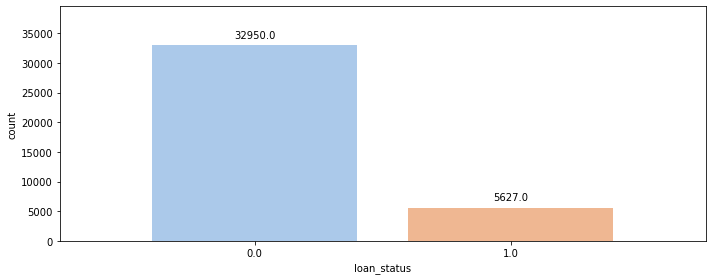

In [422]:
count_plot(loan_df,'loan_status')
plt.show()

In [416]:
round(loan_df.loc[loan_df.loan_status == 1].loan_status.count()/ len(loan_df) * 100 , 2)

14.59

## Charged off to total loans ratio = 14.59 % , Setting average default line as 15% based on the same 
Any variable with percentage of default higher than 15% should be considered a business risk.

In [409]:
loan_df.groupby('loan_status')['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0.0,32950.0,10112.837431,6901.840873,0.0,5000.0,8500.00,13950.0,35000.0
1.0,5627.0,10864.521299,7661.750567,0.0,5000.0,9401.21,15000.0,35000.0


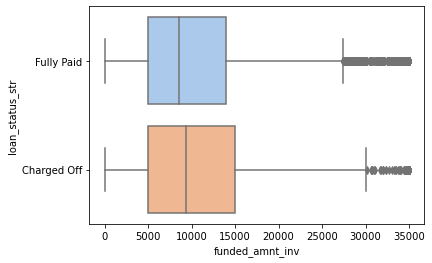

In [423]:
loan_df['loan_status_str'] = loan_df['loan_status'].apply(lambda x: 'Fully Paid' if x == 0 else "Charged Off").astype(str)

sns.boxplot(x=loan_df['funded_amnt_inv'], y = loan_df['loan_status_str'], data=loan_df, palette=sns.color_palette('pastel', 16))
plt.show()

#### Inference : Box plot depict Charged off mean and 75 percentile slightly higher as compared to fully paid : Higher the funded amount invested ther are slightly higher chances of delinquency  

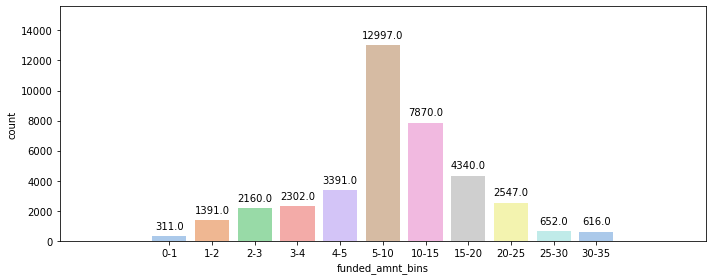

In [424]:
count_plot(loan_df,'funded_amnt_bins')

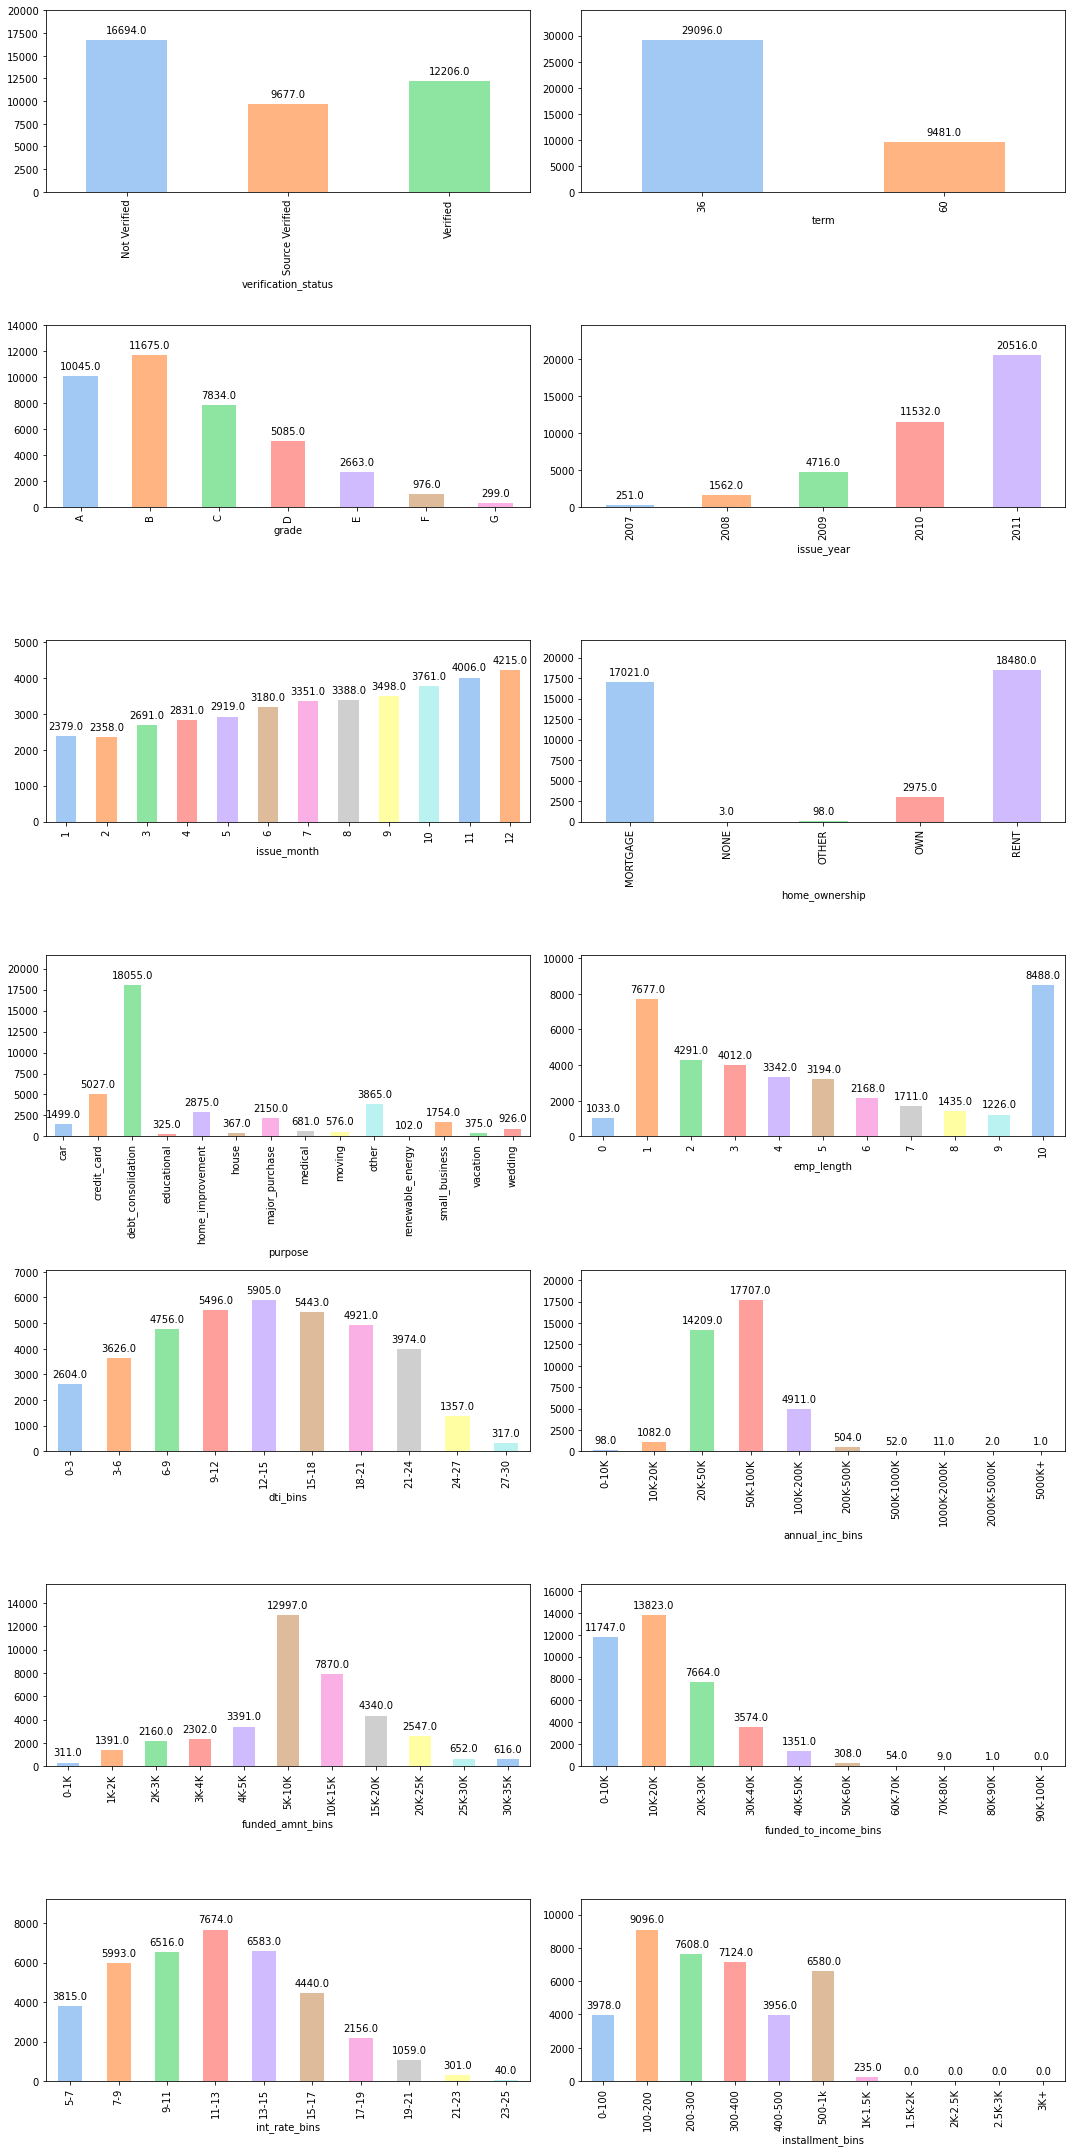

In [494]:
plt.figure(figsize=(15,30))

categoricalBarPlots(loan_df, ['verification_status','term','grade','issue_year','issue_month','home_ownership','purpose','emp_length','dti_bins','annual_inc_bins','funded_amnt_bins','funded_to_income_bins','int_rate_bins','installment_bins'])

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


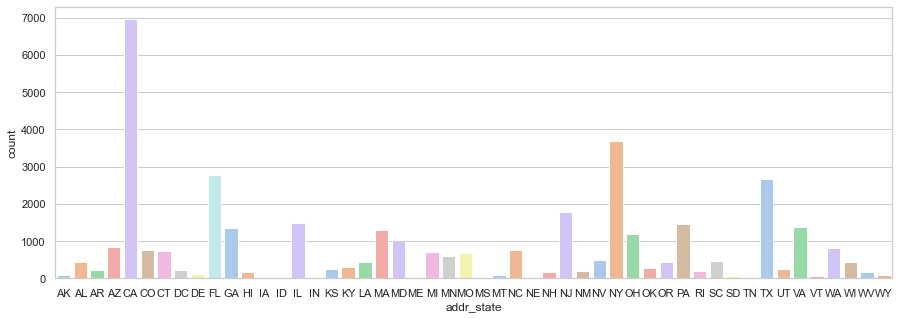

In [511]:

plt.figure(figsize=(15,5))

sns.countplot(loan_df['addr_state'],palette=sns.color_palette('pastel', 16), order=sorted(loan_df.addr_state.unique()))



plt.show()


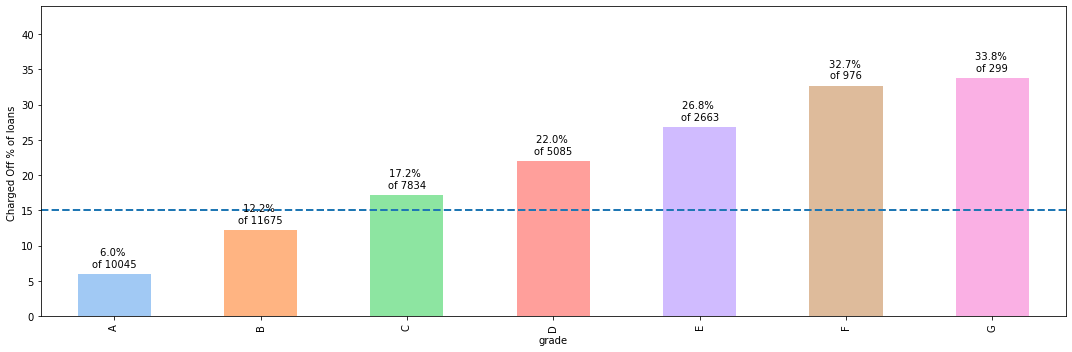

In [442]:
plot_charged_off(loan_df, 'grade')

#### Inference : Grade 
<li> As Grade increases from A to G resepctive risk of default increases. 
<li> Grade C to G are grades with the risk higher than threshold. 
<li> Grade G has highest risk     

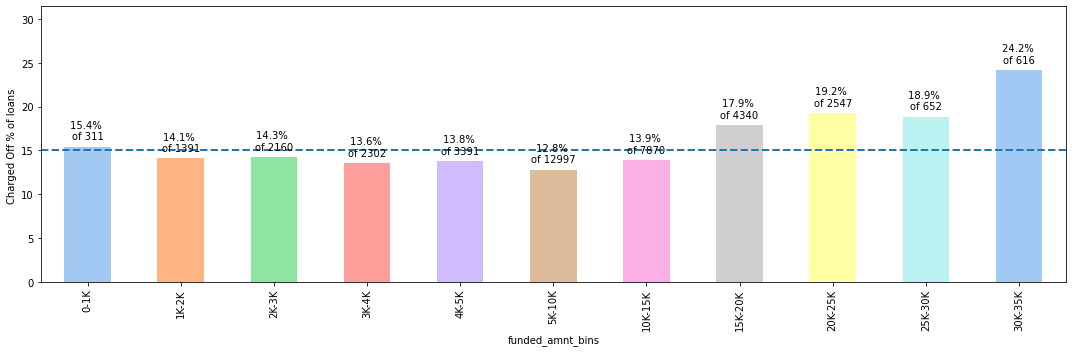

In [445]:
plot_charged_off(loan_df, 'funded_amnt_bins')

#### Inference : Funded Amount
<li> Loan amount . 
<li> 
<li>  

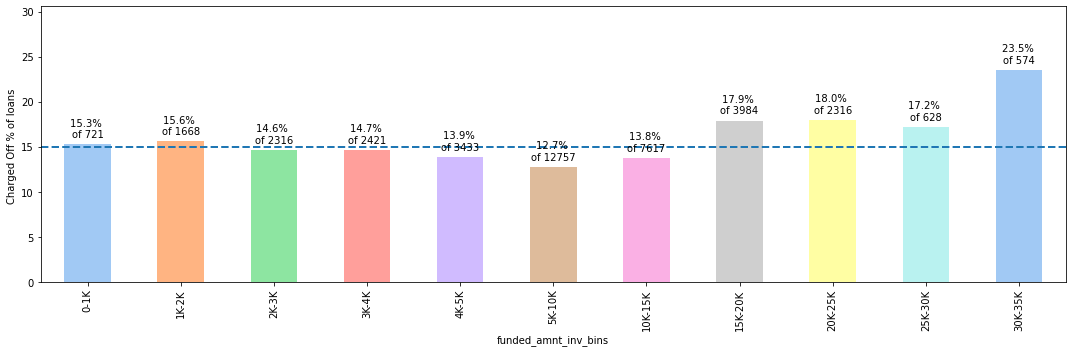

In [446]:
plot_charged_off(loan_df, 'funded_amnt_inv_bins')

#### Inference : Funded Amount Inv
<li> Loan amount . 
<li> 
<li>  

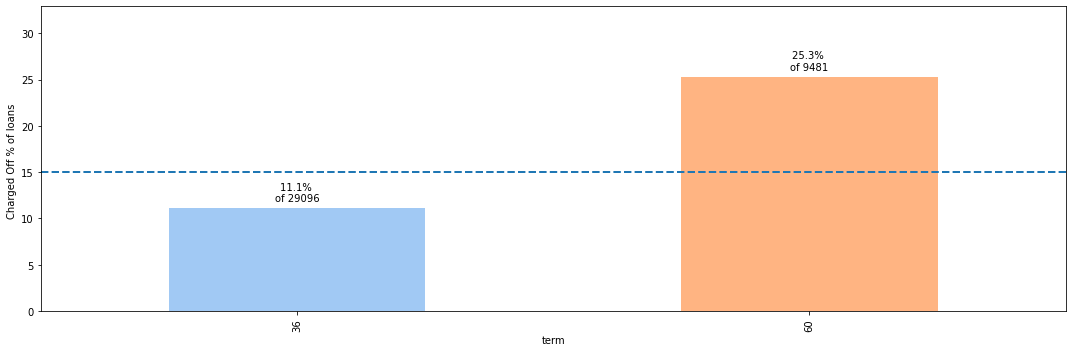

In [447]:
plot_charged_off(loan_df, 'term')

#### Inference : Funded Amount Inv
<li> Loan amount . 
<li> 
<li>  

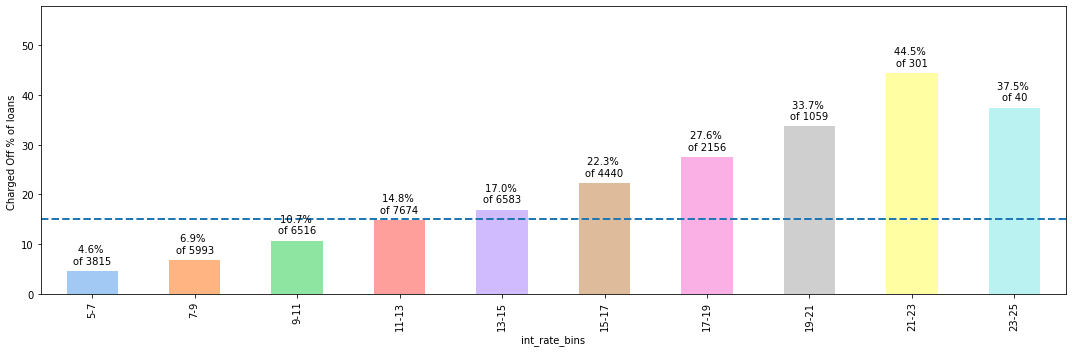

In [448]:
plot_charged_off(loan_df, 'int_rate_bins')

#### Inference : Interest Rate
<li> Loan amount . 
<li> 
<li>  

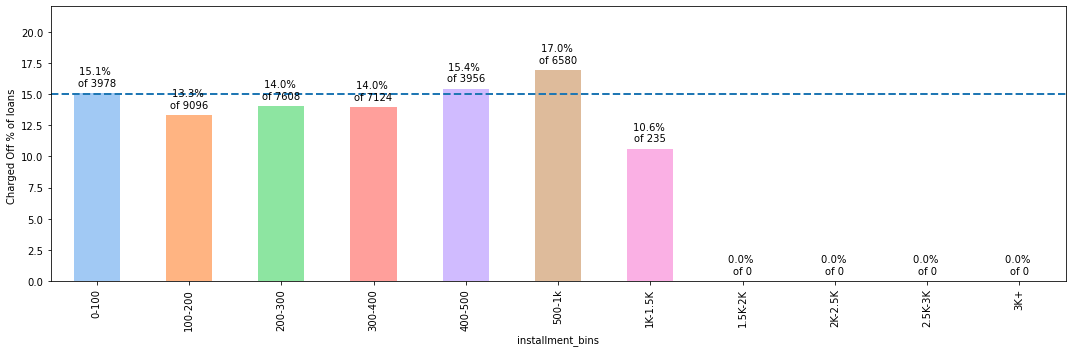

In [449]:
plot_charged_off(loan_df, 'installment_bins')

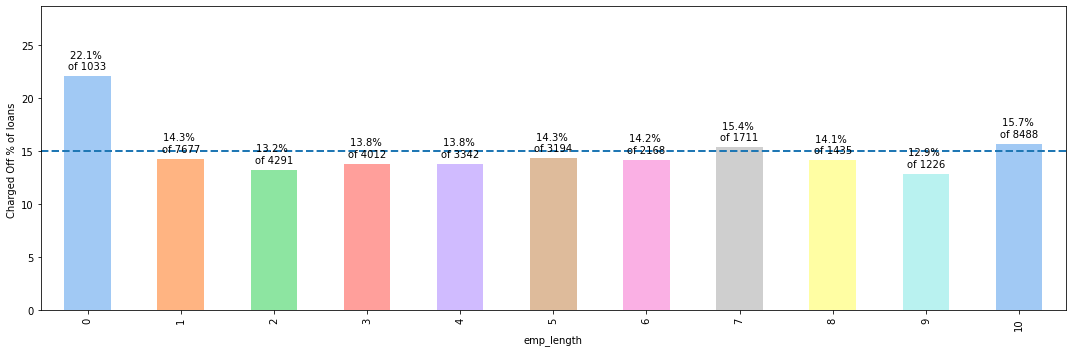

In [450]:
plot_charged_off(loan_df, 'emp_length')

#### Inference : EMployment Length
<li> Loan amount . 
<li> 
<li>  

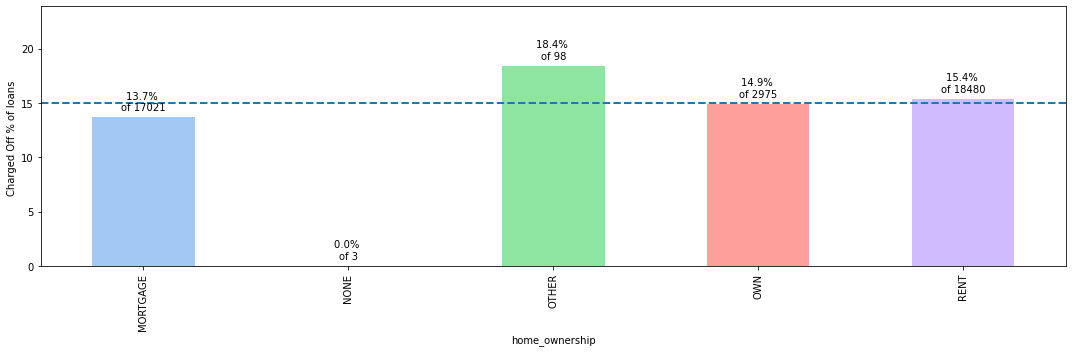

In [451]:
plot_charged_off(loan_df, 'home_ownership')

#### Inference : Home Ownership
<li> Loan amount . 
<li> 
<li> 

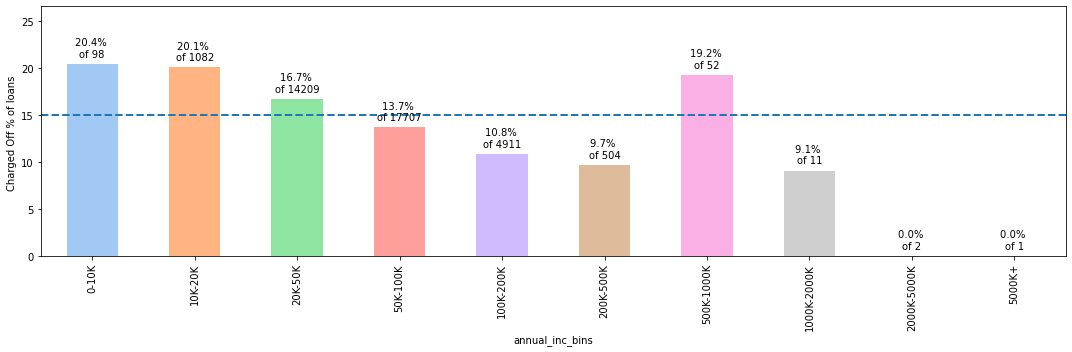

In [454]:
plot_charged_off(loan_df, 'annual_inc_bins')

#### Inference : Annual Income
<li> Loan amount . 
<li> 
<li> 

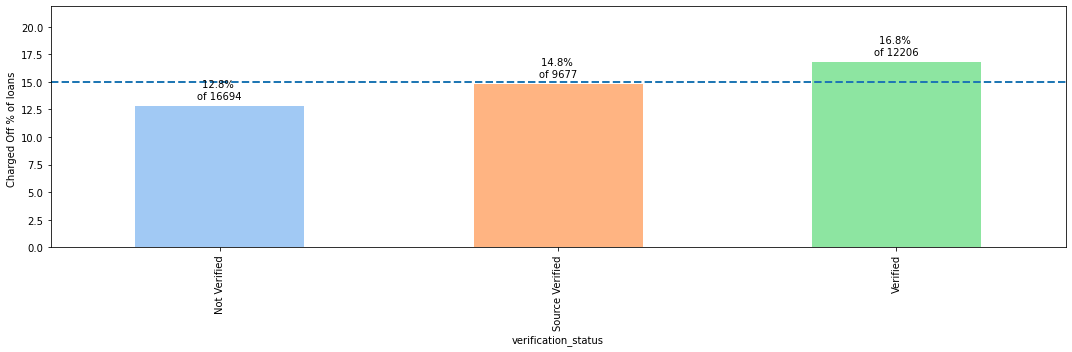

In [455]:
plot_charged_off(loan_df, 'verification_status')

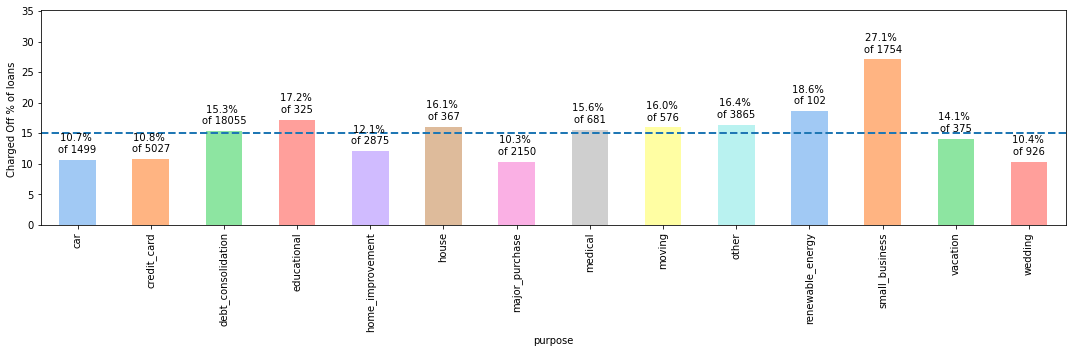

In [459]:
plot_charged_off(loan_df, 'purpose')

#### Inference : Purpose
<li> Loan amount . 
<li> 
<li> 

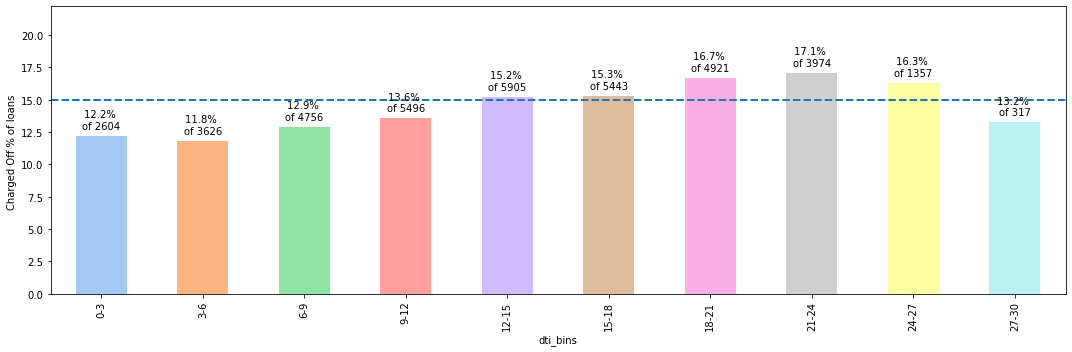

In [460]:
plot_charged_off(loan_df, 'dti_bins')

#### Inference : DTI
<li> Loan amount . 
<li> 
<li> 

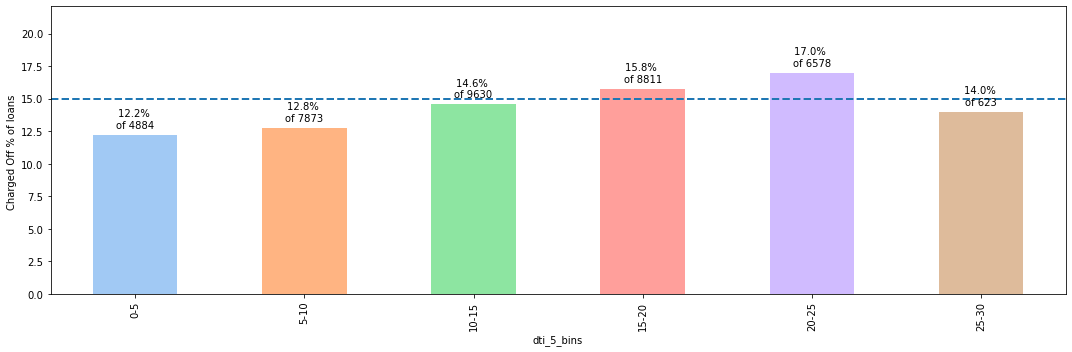

In [461]:
plot_charged_off(loan_df, 'dti_5_bins')

#### Inference : DTI
<li> Loan amount . 
<li> 
<li> 

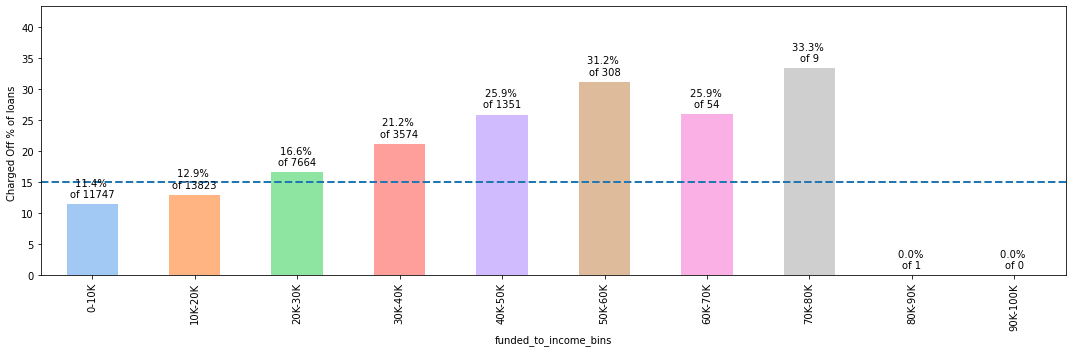

In [462]:
plot_charged_off(loan_df, 'funded_to_income_bins')

## HeatMap

<AxesSubplot:>

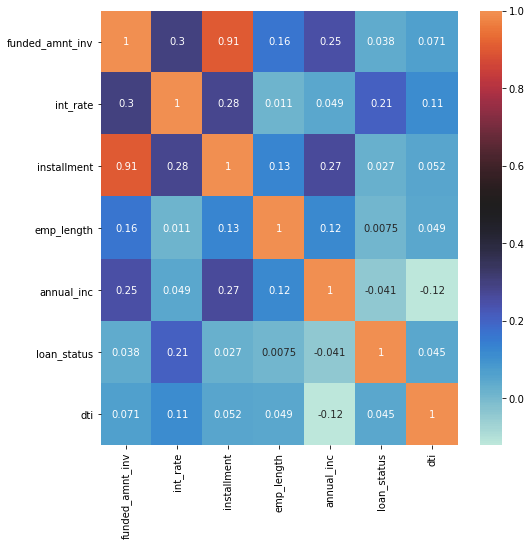

In [470]:
plt.figure(figsize=(8,8))
cont_var= ['funded_amnt_inv', 'int_rate', 'installment','grade','home_ownership',
       'emp_length', 'annual_inc','purpose','loan_status',
       'dti', 'addr_state']
corr = loan_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5 )

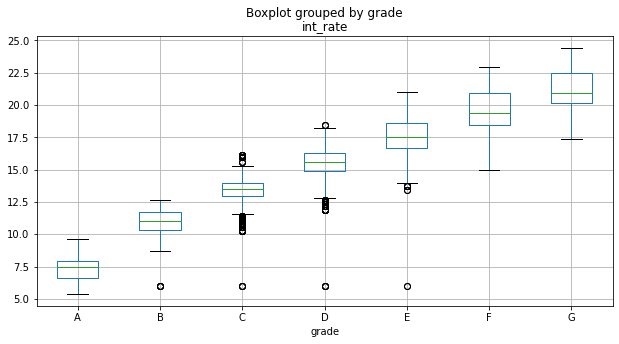

In [471]:
loan_df.boxplot(column='int_rate', by='grade',figsize=(10,5))
plt.show()

### Inference

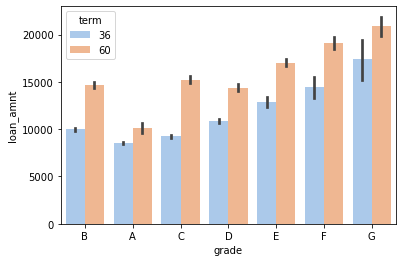

In [475]:
sns.barplot(x='grade',y='loan_amnt',hue='term',data=loan_df,palette=sns.color_palette('pastel', 16) )
plt.show()

### Inference

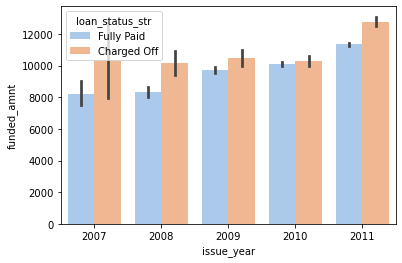

In [478]:
sns.barplot(x='issue_year', y='funded_amnt', hue="loan_status_str", data=loan_df,palette=sns.color_palette('pastel', 16))
plt.show()

### Inference

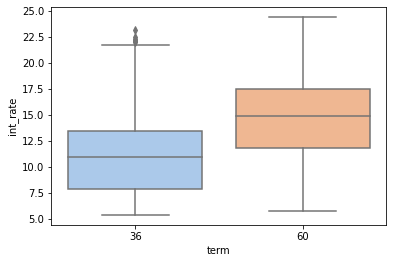

In [479]:
sns.boxplot(x='term',y='int_rate',data=loan_df,palette=sns.color_palette('pastel', 16))
plt.show()

### Inference

------------------------------------------------


COLUMN :  int_rate


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1440 with 0 Axes>

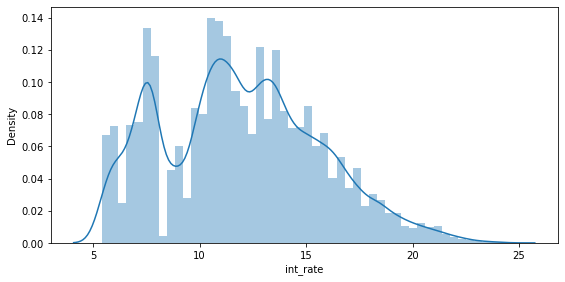

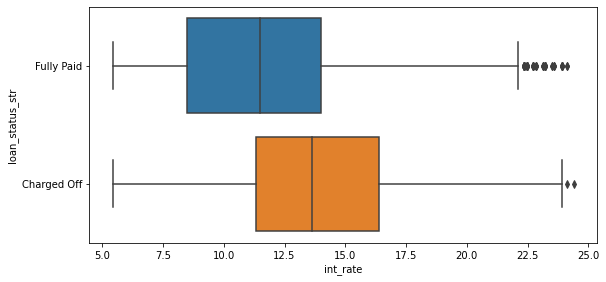

                   count       mean       std   min    25%    50%    75%  \
loan_status_str                                                            
Charged Off       5627.0  13.820432  3.654413  5.42  11.31  13.61  16.40   
Fully Paid       32950.0  11.609761  3.599964  5.42   8.49  11.49  13.99   

                   max  
loan_status_str         
Charged Off      24.40  
Fully Paid       24.11  
------------------------------------------------


COLUMN :  installment


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


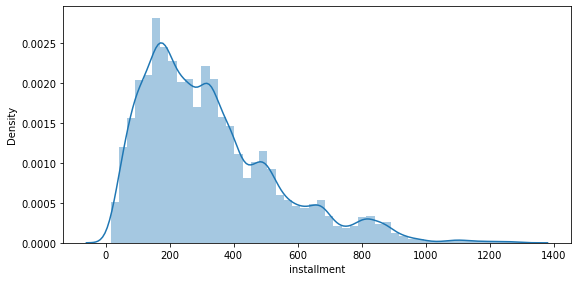

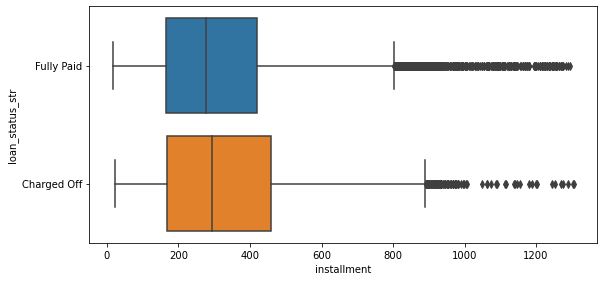

                   count        mean         std    min       25%     50%  \
loan_status_str                                                             
Charged Off       5627.0  336.175006  217.051841  22.79  168.5550  293.87   
Fully Paid       32950.0  320.125232  207.081110  15.69  165.2825  275.65   

                     75%      max  
loan_status_str                    
Charged Off      457.840  1305.19  
Fully Paid       420.735  1295.21  
------------------------------------------------


COLUMN :  annual_inc


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


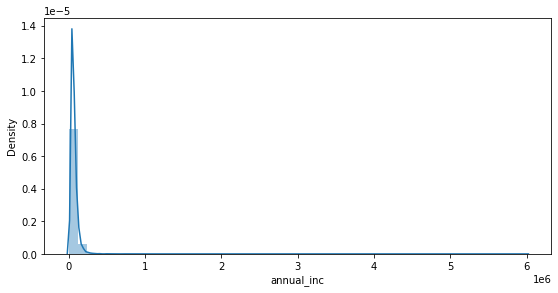

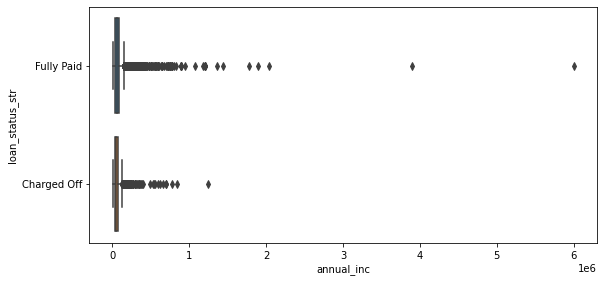

                   count          mean           std     min       25%  \
loan_status_str                                                          
Charged Off       5627.0  62427.298034  47776.014188  4080.0  37000.00   
Fully Paid       32950.0  69862.503328  66562.246521  4000.0  41132.75   

                     50%      75%        max  
loan_status_str                               
Charged Off      53000.0  75000.0  1250000.0  
Fully Paid       60000.0  84000.0  6000000.0  
------------------------------------------------


COLUMN :  dti


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


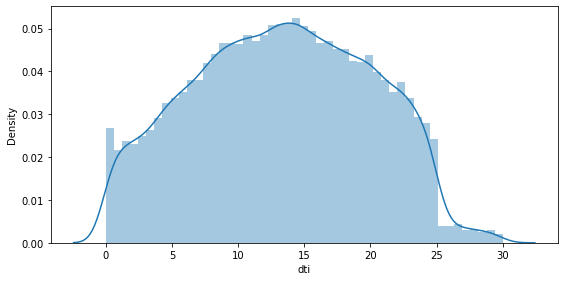

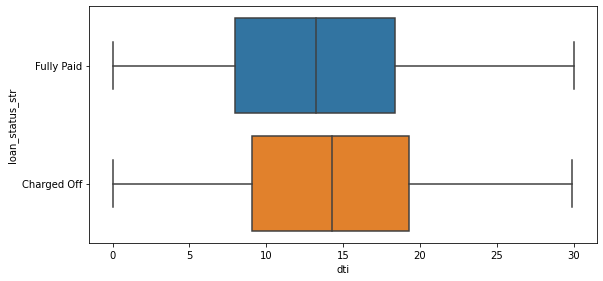

                   count       mean       std  min   25%    50%    75%    max
loan_status_str                                                              
Charged Off       5627.0  14.000624  6.585577  0.0  9.05  14.29  19.29  29.85
Fully Paid       32950.0  13.148421  6.680041  0.0  7.98  13.20  18.39  29.99


<Figure size 432x288 with 0 Axes>

In [488]:
continous_columns = ['int_rate','installment','annual_inc','dti']

rows = len(continous_columns)
plt.figure(figsize=(20,20))
for idx,col in enumerate(continous_columns,start=1):
    print("------------------------------------------------\n\n")
    print("COLUMN : ", col)
    plt.figure(figsize=(20,20))
    plt.subplot(rows, 2, idx)
    ax = sns.distplot(loan_df[col])
    plt.show()
    plt.figure(figsize=(20,20))
    plt.subplot(rows, 2, idx+1)
    bx = sns.boxplot(x=loan_df[col], y = loan_df['loan_status_str'], data=loan_df)
    plt.show()
    print(loan_df.groupby('loan_status_str')[col].describe())
plt.tight_layout()

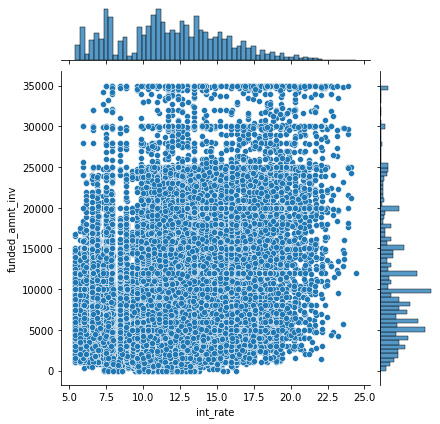

In [487]:
sns.jointplot(data=loan_df,x='int_rate', y='funded_amnt_inv',kind='scatter' )